# Getting started

In [ ]:
# import data analysis and wrangling packages
import pandas as pd
import numpy as np
import random as rnd

# import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# import/preview at train dataset

train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# import/preview test dataset

test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# check for null entries in training/test dataset
# also check for feature data types

train_df.info()
print('—'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
————————————————————————————————————————
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

- Cabin has a lot of nulls in both datasets
- Age also has quite a few in both datasets
- Embarked is missing 2 entries in training dataset
- Fare is missing 1 entry in test dataset

In [5]:
# identify numerical and categorical features

num_features = ['Age', 'Fare', 'SibSp', 'Parch']
cat_features = ['Survived', 'Pclass', 'Sex', 'Embarked']

In [6]:
# get info about features with numerical data types (we just look at training dataset)

train_df.describe()
# train_df.describe(percentiles=[.75, .8]) # for SibSp
# train_df.describe(percentiles=[.68, .69]) # for Parch
# train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]) # for Age/Fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- About 38% of passengers survived
- More than 75% of passengers travelled without children/parents
- About 30% of passengers travelled with a sibling/spouse
- Fares vary substantially
- Only about 1% of passengers were older than 65

In [7]:
# get info about features with other data types

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Every passenger has a unique name (as expected)
- Majority of passengers are male
- Ticket and Cabin both have many duplicate values
- Embarked takes on 3 possible values, S is by far the most frequent

# So where do we go from here?

Let's look at the 5 C's:

### Correlating

- How well does each feature correlate with the Survived feature?

### Completing

- We might want to complete Age feature
- Also might want to complete Embarked feature

### Correcting

- Ticket feature has almost all unique entries so we can likely drop it
- Same applies to Name feature
- Same applies to PassengerId feature
- Cabin feature is mostly incomplete so we'll likely have to drop it

### Creating

- We might want to create a FamilySize feature using the features Parch and SibSp
- We might want to create a Title feature using Mr/Mrs/etc from Name feature
- We might want to create features based on Age bands
- We might also want to create features related to Fare ranges

### Classifying

- Might want to build into model assumption that females had higher suvival rate
- Also might want to include assumption that children were more likely to survive
- Also might want to include assumption that upper class passengers were more likely to survive

# Analysis by pivoting

In [8]:
# pivot Pclass against Survived

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
#  pivot Sex against Survived

train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
#  pivot SibSp against Survived

train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
#  pivot Parch against Survived

train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- Pclass is definitely correlated with Survived (#3 from Classifying)
- So is Sex (#1 from Classifying)
- SibSp seems to be somewhat correlated with Survived
- Unclear is Parch is correlated with Survived
- Might want to create new feature based on SibSp and Parch (#1 from Creating)

# Analysis by visualization

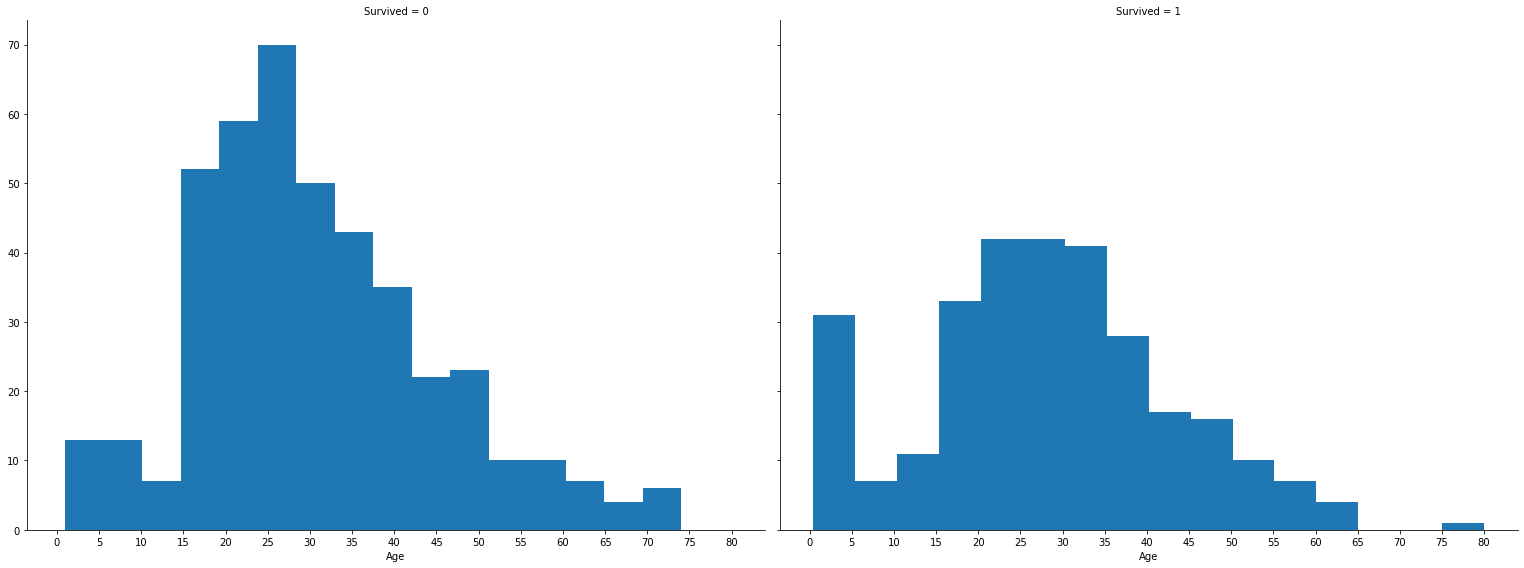

In [12]:
# Histograms illustrating correlation between Age and Survived features

g = sns.FacetGrid(train_df, col='Survived',height=8, aspect= 1.33)
g.map(plt.hist, 'Age', bins=16)
g.set(xticks=np.arange(0,81,5))
# sns.set(font_scale=2)

- Passengers with age 0-5 (i.e. infants) had high survival rate (#2 from Classifying)
- A lot of passengers age 15-30 did not survive
- Majority of passengers are in age range 15-35
- We should include Age feature (Completing #1)
- We should create feature based on Age bands (Creating #3)

C:\Users\16479\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


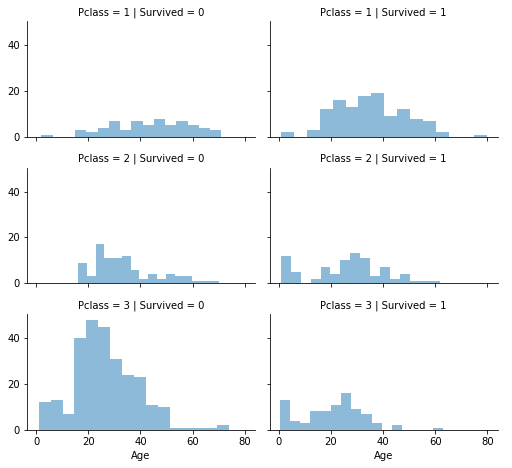

In [13]:
# Histograms illustrating correlation among Age, Pclass, and Survived features

# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=16)
# sns.set(font_scale=1)
grid.add_legend();

- Pclass=3 had most # of passengers
- Younger passengers in Pclass=2,3 had higher survival rates (#2 from Classifying)
- High percentage of passengers in Pclass=1 survived (#3 from Classifying)
- We should include Pclass feature

C:\Users\16479\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\16479\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\16479\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


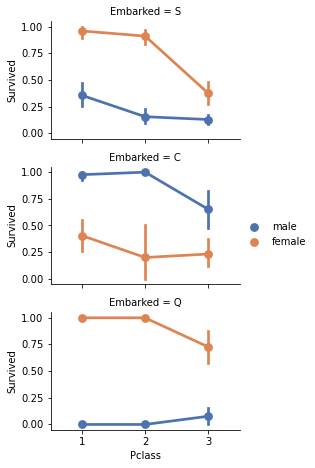

In [14]:
# Point plots illustrating correlation among Embarked, Sex, and Survived features

# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

- For the most part, female passengers had higher survival rate than male (Classifying #1)
- Exception for Embarked=C (because we're comparing multiple features, correlation not clear)
- We should include Sex feature
- Might want to complete/include Embarked feature (Completing #2)

C:\Users\16479\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\16479\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


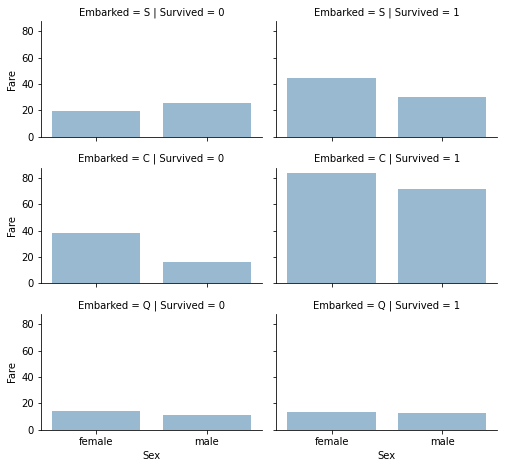

In [15]:
# Histograms illustrating correlation among Embarked, Fare, and Survived features

# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

- Passengers with higher fares survived at higher rates (Creating #4)
- Embarked features seems to be correlated with Survived (Completing #2)

# Data wrangling

- Let's drop Ticket, PassengerId, and Cabin features (Correcting #1, #3, and #4)
- We don't drop PassengerId from test dataset because of submission format requirements
- We also don't drop Name just yet because we will be creating new features from them

In [16]:
# Drop unnecessary features from training/test datasets

train_df = train_df.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
test_df = test_df.drop(columns=['Ticket', 'Cabin'])

train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [17]:
# Create Title feature based on Name feature

train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- We can combine/group many of these titles or classify them as Rare
- We have to make some assumptions, e.g. Lady --> Rare, even though Lady could also be Miss or Mrs

In [18]:
# Modify Title entries

combine = [train_df, test_df]

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

combine = [train_df, test_df]
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


C:\Users\16479\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


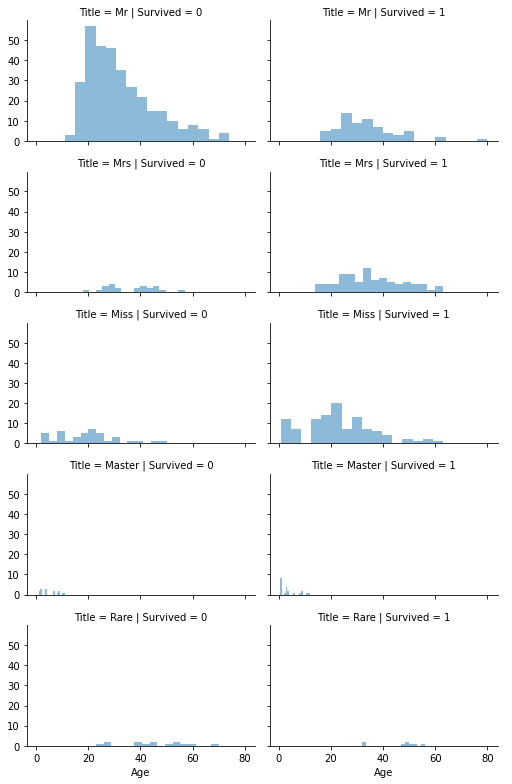

In [19]:
# Histograms illustrating correlation among Age, Title, and Survived features

# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Title', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=16)
# sns.set(font_scale=1)
grid.add_legend();

- Title feature definitely seems to be correlated with Survived
- Let's map these titles to integer labels
- After that, we can safely drop Name feature

In [20]:
# Map titles to integer labels

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

combine = [train_df, test_df]

train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [21]:
# Drop Name feature from training/test datasets

train_df = train_df.drop(columns=['Name'])
test_df = test_df.drop(columns=['Name'])
combine = [train_df, test_df]

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,NaN,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


- Just like we did with Title, let's also map Sex entries to integer labels 

In [22]:
# Map sex values to integer labels

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

combine = [train_df, test_df]

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,1


- That takes care of all Correcting points and Creating #2
- Now let's look at filling in nulls in Age feature (Completing #1)
- There are a number of ways we could go about this
- Top Kaggle notebook suggests the following:
- "More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on..."

C:\Users\16479\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


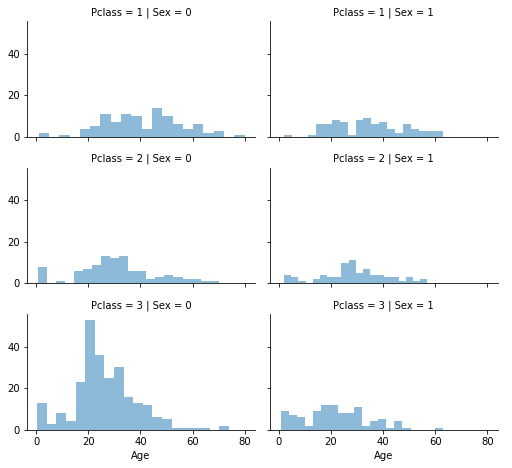

In [23]:
# Histograms illustrating correlation among Age, Pclass, and Age features

# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [24]:
# Fill null values in Age feature

guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

combine = [train_df, test_df]

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,S,5
887,1,1,1,19,0,0,30.0000,S,2
888,0,3,1,21,1,2,23.4500,S,2
889,1,1,0,26,0,0,30.0000,C,1


- Let's now look into adding AgeBand feature (Creating #3)

In [25]:
# Add AgeBand feature to training dataset only

bands = 5

train_df['AgeBand'] = pd.cut(train_df['Age'], bands)
train_df[['Survived','AgeBand']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

combine = [train_df, test_df]

In [26]:
# Replace Age feature with integer labels corresponding to AgeBand (then drop AgeBand)

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

train_df = train_df.drop(columns=['AgeBand'])
combine = [train_df, test_df]

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5
887,1,1,1,1,0,0,30.0000,S,2
888,0,3,1,1,1,2,23.4500,S,2
889,1,1,0,1,0,0,30.0000,C,1


- Now let's create a feature FamilySize (Creating #1)

In [27]:
# Create FamilySize feature

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

combine = [train_df, test_df]

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


- It's not clear this feature is useful
- Let's try adding an IsAlone feature

In [28]:
#  Create IsAlone feature

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

combine = [train_df, test_df]

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


- This feature seems more correalted with Survived
- We can now drop SibSp, Parch, and FamilySize features

In [29]:
# Drop features

train_df = train_df.drop(columns=['Parch', 'SibSp', 'FamilySize'])
test_df = test_df.drop(columns=['Parch', 'SibSp', 'FamilySize'])
combine = [train_df, test_df]

train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,S,5,1
887,1,1,1,1,30.0000,S,2,1
888,0,3,1,1,23.4500,S,2,0
889,1,1,0,1,30.0000,C,1,1


- Top Kaggle notebook also suggests adding Age*Pclass feature (literally multiplying them together)
- No motivation provided but let's give it a shot

In [30]:
# Add feature

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

combine = [train_df, test_df]

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']]

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
...,...,...,...
886,2,1,2
887,1,1,1
888,3,1,3
889,1,1,1


- Now let's complete Embarked feature (Completing #2)

In [31]:
# Most frequent Embarked value

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
# Complete Embarked feature

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

combine = [train_df, test_df]
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
# Map Embarked values to integer labels

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

combine = [train_df, test_df]

train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,0,5,1,2
887,1,1,1,1,30.0000,0,2,1,1
888,0,3,1,1,23.4500,0,2,0,3
889,1,1,0,1,30.0000,1,1,1,1


- Now let's fill the missing Fare value from the test dataset
- Let's also create FareBand feature

In [34]:
# Fill missing value

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
combine = [train_df, test_df]

In [35]:
# Add Fareband feature to training dataset only

bands = 4
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
combine = [train_df, test_df]

train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [36]:
# Replace Fare feature with integer labels corresponding to FareBand (then drop FareBand)

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(columns=['FareBand'])
combine = [train_df, test_df]
    
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1,2
887,1,1,1,1,2,0,2,1,1
888,0,3,1,1,2,0,2,0,3
889,1,1,0,1,2,1,1,1,1


# Model selection

- Our problem can be classified as regression, classification, and supervised learning
- Given this, we consider the following model types
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [37]:
# Create X/Y split for training and test data

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [38]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

- We can use coefficients from logistic regression to assess feature correlation 

In [39]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


In [40]:
# Support vector machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [42]:
# K nearest neighbours

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

In [43]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [44]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [45]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\16479\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.12

In [46]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.1

In [47]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [51]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

# Model evaluation

In [49]:
# Create model/score dataframe

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,77.10
4,Naive Bayes,72.28


# Submission

In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)